In [24]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
# from plot_trials_info import *

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\mice\\cohort3"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/mice/cohort3"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["R015"]

# DATES
# date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=10)
few_days_ago = (datetime.today() - timedelta(days=4)).strftime("%Y-%m-%d")
today = datetime.today().date()

# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

fetched 10 sessions for R015 between 2023-07-25 and 2023-08-03


In [88]:
f_name = "R01s_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max="2023-08-02",
    animal_ids=ANIMAL_IDS,
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=False,
)

Loaded pre-saved df with entries between 2023-07-25 and 2023-08-02.


In [ ]:
data = pd.DataFrame()


data["Settling"] = trials_df.avg_settling_in.mean().mean()
data["Viol"] = trials_df.query("violations ==1").cpoke_dur.mean

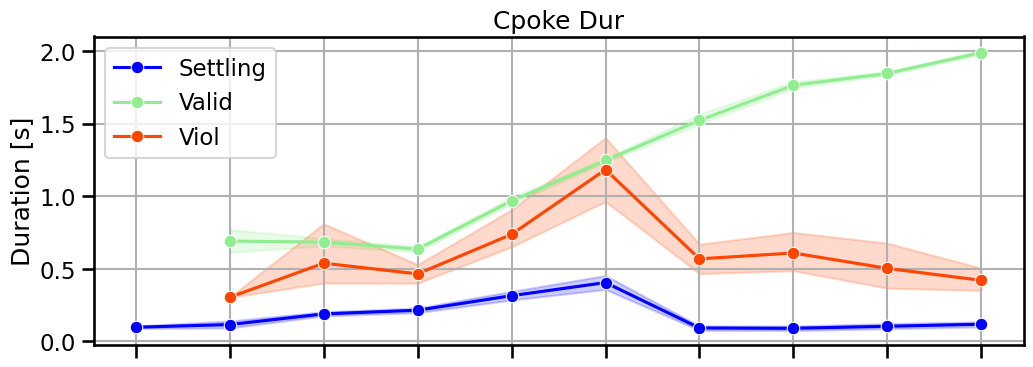

In [90]:
fig, ax = pu.make_fig()
plot_cpoke_dur_timings_pregnp(trials_df, ax=ax, title="Cpoke Dur", xaxis_label=False)

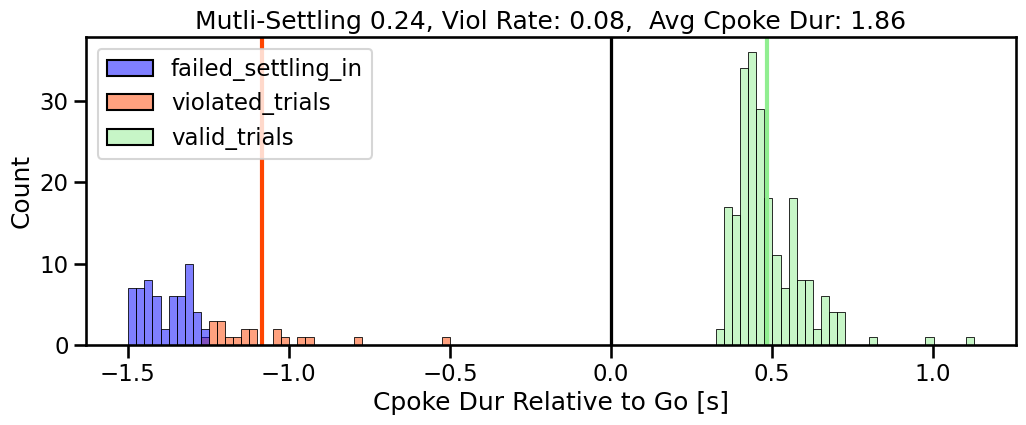

In [70]:
fig, ax = pu.make_fig()
plot_cpoke_distributions(trials_df, ax, mode="violations")

In [63]:
trials_df.query("violations == 0")

,trial,animal_id,date,sess_id,result,hits,violations,temperror,hit_rate,error_rate,...,r_water_vol,ab_l_prob,ab_r_prob,ab_beta,ab_tau,exp_del_tau,exp_del_min,exp_del_max,sound_pair,min_time_to_spoke
0,1,R015,2023-08-03,924281,1,1,0,0,0.0,0.0,...,35.0,0.5,0.5,3.0,30.0,0.5,0.1,1.2,"3.0, 3.0",2.9597
1,2,R015,2023-08-03,924281,1,1,0,0,1.0,0.0,...,35.0,0.5,0.5,3.0,30.0,0.5,0.1,1.2,"12.0, 12.0",2.3561
2,3,R015,2023-08-03,924281,1,1,0,0,1.0,0.0,...,35.0,0.5,0.5,3.0,30.0,0.5,0.1,1.2,"3.0, 3.0",2.7276
3,4,R015,2023-08-03,924281,1,1,0,0,1.0,0.0,...,35.0,0.5,0.5,3.0,30.0,0.5,0.1,1.2,"12.0, 3.0",2.7559
4,5,R015,2023-08-03,924281,1,1,0,0,1.0,0.0,...,35.0,0.5,0.5,3.0,30.0,0.5,0.1,1.2,"3.0, 12.0",2.6848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,239,R015,2023-08-03,924281,1,1,0,0,1.0,0.0,...,35.0,0.5,0.5,3.0,30.0,0.5,0.1,1.2,"3.0, 3.0",2.7581
239,240,R015,2023-08-03,924281,1,1,0,0,1.0,0.0,...,35.0,0.5,0.5,3.0,30.0,0.5,0.1,1.2,"12.0, 3.0",3.6562
240,241,R015,2023-08-03,924281,1,1,0,0,1.0,0.0,...,35.0,0.5,0.5,3.0,30.0,0.5,0.1,1.2,"12.0, 3.0",2.7198
241,242,R015,2023-08-03,924281,1,1,0,0,1.0,0.0,...,35.0,0.5,0.5,3.0,30.0,0.5,0.1,1.2,"3.0, 12.0",2.6941


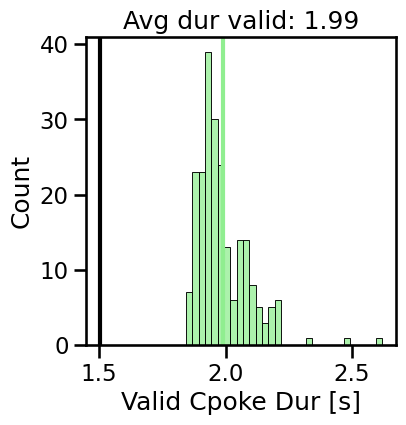

In [71]:
fig, ax = pu.make_fig("s")
plot_avg_valid_cpoke_dur(trials_df, ax)

[Text(0.5, 0, 'Failed Cpoke Dur [s]'), Text(0.5, 1.0, 'Avg dur Viol 0.42 s')]

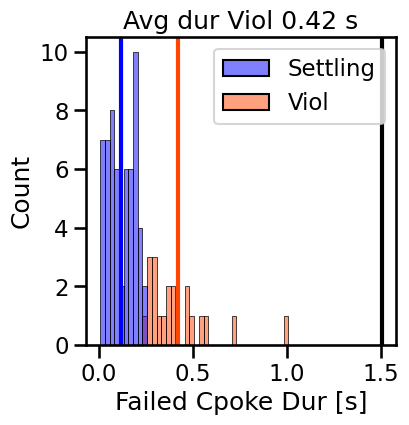

In [83]:
fig, ax = pu.make_fig("s")

data = pd.DataFrame()

data["Settling"] = trials_df.avg_settling_in
data["Viol"] = trials_df.query("violations ==1").cpoke_dur

pal = ["blue", pu.RESULT_MAP[3]["color"]]

sns.histplot(data=data, binwidth=0.025, palette=pal, ax=ax)


avg_viol_cpoke = trials_df.query("violations == 1").cpoke_dur.mean()
ax.axvline(avg_viol_cpoke, color=pal[1], lw=3)
avg_settling_in = trials_df.avg_settling_in.mean()
ax.axvline(avg_settling_in, color=pal[0], lw=3)
ax.axvline(trials_df.pre_go_dur.mean(), color="k", lw=3)

ax.set(
    xlabel="Failed Cpoke Dur [s]",
    title="Avg dur Viol {:.2f} s".format(avg_viol_cpoke),
)

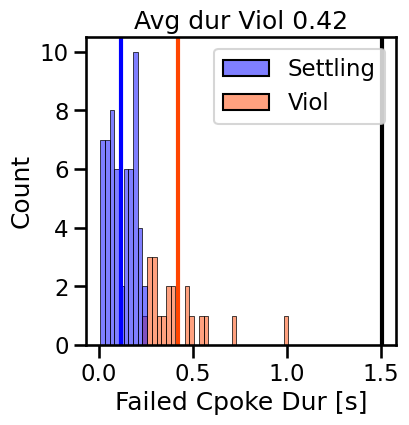

In [86]:
fig, ax = pu.make_fig("s")

plot_avg_failed_cpoke_dur(trials_df, ax, mode="violations")